In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from tensorflow.keras.datasets import imdb ## 자연어 처리를 위한 DB
from konlpy.tag import Twitter #한글 언어
from konlpy.tag import Okt
from konlpy.tag import Kkma 
from konlpy.tag import Twitter
from pprint import pprint
import nltk ## 영어, 일반적인 언어 패키지
from nltk.classify.scikitlearn import SklearnClassifier
from wordcloud import WordCloud, STOPWORDS 
from gensim import corpora, models #일반적인 자언어 패키지
import numpy  as np
from PIL import Image
from wordcloud import ImageColorGenerator
import glob
import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
%matplotlib inline


In [3]:
ko_str = '이것은 한국어 문장입니다.'
ja_str = 'これは日本語の文章です。'
en_str = 'This is English Sentences.'
ch_str = '统一码'

#ASCII 코드 0~65535
print(ord(ko_str[0])) #'이' ASCII 코드
print(ord(ja_str[0]))
print(ord(en_str[0]))
print(ord(ch_str[0]))

51060
12371
84
32479


In [4]:
# Unicode 코드 포인트로 출현 빈도 판정하기 --- (*1)
def count_codePoint(str):
    # Unicode 코드 포인트를 저장할 배열 준비하기 --- (*2)
    counter = np.zeros(65535)
    for i in range(len(str)):
        # 각 문자를 Unicode 코드 포인트로 변환하기 --- (*3)
        code_point = ord(str[i])
        if code_point > 65535 :
            continue
        # 출현 횟수 세기 --- (*4)
        counter[code_point] += 1

    # 각 요소를 문자 수로 나눠 정규화하기 --- (*5)
    counter = counter/len(str)
    return counter

In [5]:
# 학습 전용 데이터 준비하기
ko_str = '이것은 한국어 문장입니다.'
ja_str = 'これは日本語の文章です。'
en_str = 'This is English Sentences.'

x_train = [count_codePoint(ko_str),count_codePoint(ja_str),count_codePoint(en_str)]
y_train = ['ko','ja','en']

In [6]:
x_train[0] # 0~54620 값들이 있다  # ko_str
print(np.where(x_train[0] >0)) ## np.where 을 사용하여 0 삭제, 이값들은 인덱스 값들이다.
index = np.where(x_train[0] >0)
data = x_train[0]
print(data[[32,46,44163]])
print(data[index]) ## for 문을 사용하지 않고 슬라이싱을 통해서 값 호출

(array([   32,    46, 44163, 44397, 45768, 45796, 47928, 50612, 51008,
       51060, 51077, 51109, 54620], dtype=int64),)
[0.14285714 0.07142857 0.07142857]
[0.14285714 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857]


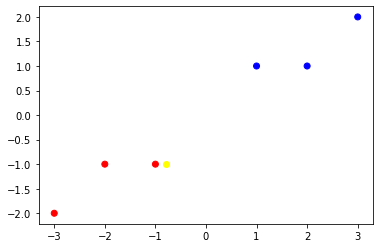

In [7]:
#X = np.array([[-1, -1], [3, 2]])
#Y = np.array([1,  2])

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array(['r','r','r','b','b','b'])


color = [ 'red' if y == 'r' else 'blue' for y in Y]

plt.scatter(X[:, 0], X[:, 1], color=color)

t = np.array([[-0.8, -1]])

plt.scatter(t[:,0], t[:,1], color='yellow')

In [8]:
clf = GaussianNB()
clf.fit(X,Y) ### y값은 참고만 하는 값이고 계산이 들어가지 않기 때문에 문자열로 넣어도 상관없다.
print(clf.predict([[2.5,1.3]]))

['b']


In [9]:
# 학습하기 --- (*6)
clf = GaussianNB() 
clf.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
y_pred = clf.predict([count_codePoint(' ')])
print(y_pred)

['ko']


In [11]:
# 평가 전용 데이터 준비하기
ko_test_str = '안녕 내 이름은'
ja_test_str = 'こんにちは'
en_test_str = 'Hello'
x_test = [count_codePoint(en_test_str),count_codePoint(ja_test_str),count_codePoint(ko_test_str)]
y_test = ['en', 'ja', 'ko']

# 평가하기 --- (*7)
y_pred = clf.predict(x_test)
print(y_pred)
print("정답률 = " , accuracy_score(y_test, y_pred))

['en' 'ja' 'ko']
정답률 =  1.0


In [12]:
# 학습 데이터 준비하기 --- (*1)
x_train = []
y_train = []
for file in glob.glob('./language/train/*.txt'):
    # 언어 정보를 추출하고 레이블로 지정하기 --- (*2)
    print(file)
    y_train.append(file[17:19])
    
    # 파일 내부의 문자열을 모두 추출한 뒤 빈도 배열로 변환한 뒤 입력 데이터로 사용하기 --- (*3)
    file_str = ''
    for line in open(file, 'r', encoding='UTF8'):
        file_str = file_str + line
    x_train.append(count_codePoint(file_str))

./language/train\de_cat.txt
./language/train\de_dog.txt
./language/train\de_elephant.txt
./language/train\en_cat.txt
./language/train\en_dog.txt
./language/train\en_elephant.txt
./language/train\es_cat.txt
./language/train\es_dog.txt
./language/train\es_elephant.txt


In [13]:
# 학습하기
clf = GaussianNB() 
clf.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
y_pred = clf.predict([count_codePoint('Großkatzen')])
print(y_pred)

['de']


# 단어 빈도수 기반 자연어 처리

In [15]:
corpus = [ 'you know i want your love',
         'i like you',
         'what should i do',
         'what should',
         'should what']
stn = " ".join(corpus)
stn = stn.split(' ')
print(stn)

freq = {}
for i in stn:
    freq[i] = freq.get(i,0)+1
    
print(freq)

['you', 'know', 'i', 'want', 'your', 'love', 'i', 'like', 'you', 'what', 'should', 'i', 'do', 'what', 'should', 'should', 'what']
{'you': 2, 'know': 1, 'i': 3, 'want': 1, 'your': 1, 'love': 1, 'like': 1, 'what': 3, 'should': 3, 'do': 1}


In [16]:
vector = CountVectorizer() 
tf = vector.fit_transform(corpus) ## 원핫인코딩을 해주는 함수
print(tf)
print(tf.toarray()) ## 단어수에 따라 1를 표현하는데 단어길이가 1개인경우 0으로처리

  (0, 7)	1
  (0, 1)	1
  (0, 5)	1
  (0, 8)	1
  (0, 3)	1
  (1, 7)	1
  (1, 2)	1
  (2, 6)	1
  (2, 4)	1
  (2, 0)	1
  (3, 6)	1
  (3, 4)	1
  (4, 6)	1
  (4, 4)	1
[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 1 0 0]]


In [17]:
print(tf.shape)

(5, 9)


In [18]:
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지 보여준다.

{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [19]:
print(vector.vocabulary_['you'])
print(vector.vocabulary_.get('you'))

7
7


In [20]:
words = vector.get_feature_names() # 순서대로 정렬되어있음
for word in words: print(word)

print('===============')    
for key in vector.vocabulary_: # 순서는 랜덤으로 지정되어있다.
    print(key)

do
know
like
love
should
want
what
you
your
you
know
want
your
love
like
what
should
do


* TF-IDF
    * TF: 현재 문서에서 단어 A가 나타난 횟수(단어빈도수)  
    * DF: 단어가 나타난 문서의 수( 다른 문서에서 언급횟수)
    * 특정 단어의 상대적인 빈도를 나타내주는 값
    * 값이 클 수록 내 문서에만 많이 언급되는 단어(=다른 문서에서는 잘 언급 안됨)
    * 값이 작을수록 다른 문서에 잘 언급하는 단어를 의미(=현재 문서와 관련없음)
    
 IDF 는 특정 문서에서 언급이 높을 경우에 높다. (DF 와 반비례)

<img src=tf-idf.png>

In [21]:
sent = ["오늘 휴일", 
        "휴일 오늘", 
        "휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.", 
        "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니 다.", 
        " 내일 은 반가운 비 소식 이 있습니다."] 

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent) # 스페이스 기준으로 문장 벡터화 진행
print(tfidf_matrix)

  (0, 17)	0.6437444595062429
  (0, 7)	0.7652405313723362
  (1, 17)	0.6437444595062429
  (1, 7)	0.7652405313723362
  (2, 12)	0.28487998702172107
  (2, 6)	0.28487998702172107
  (2, 4)	0.28487998702172107
  (2, 1)	0.28487998702172107
  (2, 9)	0.35310140100264525
  (2, 14)	0.28487998702172107
  (2, 8)	0.35310140100264525
  (2, 13)	0.35310140100264525
  (2, 5)	0.35310140100264525
  (2, 17)	0.19893117008503197
  (2, 7)	0.23647612349029334
  (3, 11)	0.3542556015420614
  (3, 16)	0.3542556015420614
  (3, 3)	0.3542556015420614
  (3, 10)	0.3542556015420614
  (3, 0)	0.3542556015420614
  (3, 2)	0.3542556015420614
  (3, 15)	0.3542556015420614
  (3, 14)	0.28581118874948447
  (3, 17)	0.1995814265359179
  (4, 12)	0.5
  (4, 6)	0.5
  (4, 4)	0.5
  (4, 1)	0.5


In [22]:
print(tfidf_matrix.toarray().shape)
print(tfidf_matrix.toarray()) 

# TFID 값이 높으면 내 문장에서만 빈도수가 높고 다른곳에서는 낮다
# ex) 0.288 -> 다른곳에서도 언급이 되는 값. 0.76 -> 내곳에서 언급이되고 다른곳에서는 언급이 안되는 값. 

(5, 18)
[[0.         0.         0.         0.         0.         0.
  0.         0.76524053 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.64374446]
 [0.         0.         0.         0.         0.         0.
  0.         0.76524053 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.64374446]
 [0.         0.28487999 0.         0.         0.28487999 0.3531014
  0.28487999 0.23647612 0.3531014  0.3531014  0.         0.
  0.28487999 0.3531014  0.28487999 0.         0.         0.19893117]
 [0.3542556  0.         0.3542556  0.3542556  0.         0.
  0.         0.         0.         0.         0.3542556  0.3542556
  0.         0.         0.28581119 0.3542556  0.3542556  0.19958143]
 [0.         0.5        0.         0.         0.5        0.
  0.5        0.         0.         0.         0.         0.
  0.5        0.         0.         0.         0.         0.        ]]


In [23]:
features = tfidf_vectorizer.get_feature_names() # 한글자 단어 빠짐
#위 array 값 순서가 features 의 인덱스 값이라고 생각하면 된다. 
# 첫문장 0.75624053 == 오늘 (8번째)
print(features)

['갑작스런', '내일', '놀러왔다가', '망연자실', '반가운', '서쪽', '소식', '오늘', '으로', '이어졌는데요', '인해', '있습니', '있습니다', '중심', '폭염', '피해서', '하고', '휴일']


In [24]:
mat = np.asarray(tfidf_matrix.toarray()) # == mat = tfidf_matrix.toarray() 혹시 list 형식이면 numpy 형식으로 바꿔주기 위해서 해줌
srch = ['내일','폭염']
print([ tfidf_vectorizer.vocabulary_.get(i) for i in srch])
srch_dtm = mat[:, [ tfidf_vectorizer.vocabulary_.get(i) for i in srch]]
mat[:,[7,17]]
print(srch_dtm)

[1, 14]
[[0.         0.        ]
 [0.         0.        ]
 [0.28487999 0.28487999]
 [0.         0.28581119]
 [0.5        0.        ]]


In [25]:
score = srch_dtm.sum(axis=1)
print(score)
for i in range(len(score)):
    if score[i] > 0:
        print( '{} / score : {}'.format(sent[i], score[i]))

[0.         0.         0.56975997 0.28581119 0.5       ]
휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다. / score : 0.5697599740434421
폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니 다. / score : 0.28581118874948447
 내일 은 반가운 비 소식 이 있습니다. / score : 0.5


# 분류

In [26]:
sentences = ['This is the first document.',
              'This is the second document.',
              'And the third one.',
              'Is this the first document?']
vect = TfidfVectorizer()
X = vect.fit_transform(sentences)

In [27]:
y = [1,1,2,2]
model =  SGDClassifier(loss='perceptron')   #단층 퍼셉트론
model.fit(X, y) #Dense를 안넣어줘도 된다.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='perceptron',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
X_pred = vect.transform(['My new document third'])
y_pred = model.predict(X_pred)
print(y_pred)

[2]


In [29]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)  # 단어 빈도수 상위 10000개 사용

In [30]:
print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = max(y_train) + 1
print('카테고리 : {}'.format(num_classes))
# 이 경우에는 긍정을 의미하는 1의 값을 가집니다. 0은 부정

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [31]:
print(X_train[0])
print(X_train[1])
print(len(X_train[0]))   
print(len(X_train[1]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 1

리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


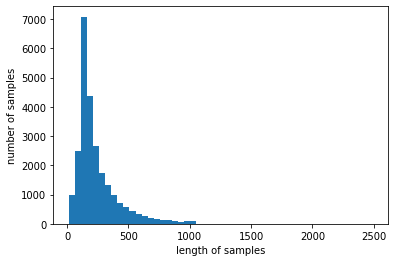

In [32]:
print('리뷰의 최대 길이 : {}'.format(max(len(l) for l in X_train)))
print('리뷰의 평균 길이 : {}'.format(sum(map(len, X_train))/len(X_train)))

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [33]:
word_to_index = imdb.get_word_index()    # 없으면 다운로드함

In [34]:
word_to_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [35]:
index_to_word={}
for key, value in word_to_index.items():
    index_to_word[value] = key

In [36]:
index_to_word

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [37]:
print(index_to_word[1])
print(index_to_word[14])

the
as


In [38]:
' '.join([index_to_word[X] for X in X_train[0]])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [39]:
X_train_s = [' '.join([index_to_word[X] for X in X_train[i]]) 
             for i in range(len(X_train))  ]
X_test_s = [' '.join([index_to_word[X] for X in X_test[i]]) 
            for i in range(len(X_test))  ]

In [40]:
X_train_s[600]

"the places and social i i was one life is seriously br highly views fact many should movie of and of jane did subsequently escapes to criminals disc \x96 was supposed strange light of directed end his form first as unlikely or sex in gang of you it cockney film walter love and or is time death guy moment see knew such of violence happen between finally should movie even then through some more then through some more vanessa also have what would role have vanessa car have to what would language have poor performances it br on son i i as you landscape time over being quickly to in at shooting was against laugh read has when giant to jr with irs moving any movie from he out is save br and weren't decent like ever family even scientist and an from people it critics to and unfortunately of problem on to what of decent tells passing were romeo no from people and of insights he used funniest has catches jane it's don't by br of decent help with cute and football mildred no poor never stinks w

In [41]:
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(X_train_s+X_test_s)

# transform the training and test data using count vectorizer object
xtrain_count =  count_vect.transform(X_train_s)
xtest_count =  count_vect.transform(X_test_s)

In [42]:
[1,2,3,4] + [5,6]

[1, 2, 3, 4, 5, 6]

In [43]:
print(xtrain_count.shape)

(25000, 9774)


In [44]:
print(len(X_train[0]))

218


In [45]:
print(xtrain_count[0])

  (0, 138)	1
  (0, 224)	1
  (0, 312)	1
  (0, 456)	3
  (0, 463)	6
  (0, 523)	1
  (0, 527)	2
  (0, 597)	1
  (0, 632)	3
  (0, 676)	1
  (0, 681)	1
  (0, 829)	1
  (0, 893)	1
  (0, 1005)	1
  (0, 1069)	1
  (0, 1151)	2
  (0, 1299)	3
  (0, 1340)	1
  (0, 1529)	1
  (0, 1580)	1
  (0, 2171)	1
  (0, 2220)	1
  (0, 2668)	1
  (0, 3021)	1
  (0, 3114)	2
  :	:
  (0, 8766)	1
  (0, 8772)	2
  (0, 8779)	3
  (0, 8780)	1
  (0, 8792)	2
  (0, 8816)	1
  (0, 8889)	9
  (0, 9094)	2
  (0, 9173)	1
  (0, 9318)	1
  (0, 9382)	1
  (0, 9442)	1
  (0, 9466)	3
  (0, 9470)	1
  (0, 9475)	1
  (0, 9544)	1
  (0, 9550)	2
  (0, 9555)	1
  (0, 9557)	1
  (0, 9575)	1
  (0, 9593)	1
  (0, 9633)	11
  (0, 9655)	1
  (0, 9732)	1
  (0, 9744)	6


In [46]:
model = LinearSVC() # 단층 퍼셉트론
model.fit(xtrain_count, y_train)

C:\Users\Student\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [47]:
y_pred = model.predict(xtest_count)
print(len(y_pred))
print(y_pred)
sum((y_test == y_pred)*1) / len(y_pred)

25000
[0 1 1 ... 0 0 1]


0.83

# 긍정부정 

In [48]:
text = """
    Lee Kye-byok, 48, who captured seven million viewers a year ago with the film 'Lucky', presented his new work 'Strengthen, Mystery'. Both works have something in common: the protagonist has a reversed past, but the texture is completely different. If 'Lucky' comically depicts what happens when a murder contractor suffers from amnesia and mistooks himself as an anonymous actor, the new work is a hidden story of a woman's story through the travel stories of Dad's child (Cha Seung-won) and her daughter's adult (Jum Chae-young). Reveal the past. In the process, he summoned the Daegu subway fire disaster in 2003 and was impressed.

Lee Gye-byeol, who met at Samcheong-dong, Jongno-gu, Seoul on the 2nd, said, "I hope to be comforted to those who are hurt and suffered."
"""
text_count = count_vect.transform([text]) #text를 리스트 형태로 넣어주어야 한다.
y_pred = model.predict(text_count)


In [49]:
print(len(y_pred))
print(y_pred)
sum((y_test == y_pred)*1) / len(y_pred)

1
[0]


12500.0

In [50]:
tfidf_vect = TfidfVectorizer(analyzer='word')
tfidf_vect.fit(X_train_s+X_test_s)
Xtrain_tfidf = tfidf_vect.transform(X_train_s)
Xtest_tfidf = tfidf_vect.transform(X_test_s)

In [51]:
model = LinearSVC()
model.fit(Xtrain_tfidf, y_train)
y_pred = model.predict(Xtest_tfidf)
sum((y_test == y_pred)*1) / len(y_pred)

0.87456

# 형태소 분석

In [52]:
okt = Okt()
malist = okt.pos("아버지 가방에 들어가신다.", norm=True, stem=True) 
print(malist)

# https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
#에러 발생시 위 사이트 에 들어가서 jpype1-0.7.1-cp37 다운
#jpype1 uninstall 한다음
#pip install --upgrade pip
#pip install JPype1‑0.7.0‑cp35‑cp35m‑win_amd64.whl
#pip install jpype1-0.7..파일
#pip install konlpy
#시스템 환경설에서 변수 설정에 JAVA_HOME 추가해주어야 한다.

JVMNotFoundException: No JVM shared library file (jvm.dll) found. Try setting up the JAVA_HOME environment variable properly.

In [5]:
okt = Okt()
malist = okt.pos("아버지 가방에 들어가신다.", norm=True, stem=True) 
print(malist)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]


In [9]:
print(okt.nouns(u'을지로 3가역 주변 첨단빌딩숲 사이에 자리 잡은 커피집')) ## 명사만 추출
print(okt.nouns('짜장면 2개 짬뽕 3개 탕수육 한개 주세요'))
print(okt.pos('짜장면 2개 짬뽕 3개 탕수육 한개 주세요'))
print(okt.pos(u'이것도 되나요 ㅋㅋ'))
print(okt.pos(u'이것도 되나요 ㅋㅋ', norm=True,stem=True))

['을지로', '역', '주변', '첨단', '빌딩', '숲', '사이', '자리', '커피집']
['짜장면', '개', '짬뽕', '개', '탕수육']
[('짜장면', 'Noun'), ('2', 'Number'), ('개', 'Noun'), ('짬뽕', 'Noun'), ('3', 'Number'), ('개', 'Noun'), ('탕수육', 'Noun'), ('한개', 'Modifier'), ('주세요', 'Verb')]
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되나요', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되다', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]


In [15]:
kkma = Kkma()
#문장분리
print('kkma 문장분리 : ', kkma.sentences('안녕하세요. 반갑습니다. 저는 인공지능 입니다.'))
#명사 추출
print('kkma 명사만 추출 : ', kkma.nouns('안녕하세요. 반갑습니다. 저는 인공지능 입니다.'))

kkma 문장분리 :  ['안녕하세요.', '반갑습니다.', '저는 인공지능 입니다.']
kkma 명사만 추출 :  ['안녕', '저', '인공', '인공지능', '지능']


In [16]:
print('kkma 문장분리 : ', kkma.nouns('짜장면 2개 짬뽕 3개 탕수육 한개 주세요'))
print('okt 명사만 추출 : ', okt.nouns('짜장면 2개 짬뽕 3개 탕수육 한개 주세요'))

kkma 문장분리 :  ['짜장면', '2', '2개', '개', '짬뽕', '3', '3개', '개', '탕수육']
okt 명사만 추출 :  ['짜장면', '개', '짬뽕', '개', '탕수육']


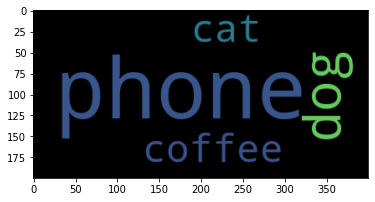

In [2]:
text = "coffee phone phone phone phone phone phone phone phone phone cat dog dog"
wordcloud = WordCloud(max_font_size=100).generate(text)
fig = plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')